<a href="https://colab.research.google.com/github/groupe11ML/groupe11ML/blob/main/TP6_les_r%C3%A9seaux_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GROUPE 11 
#KEUFACK DONGMO BELVIANE BERENICE 19Y204
#LEUKAM FERMAT 19Y208
#LONTSI TIDOH MOREL 19Y082
#TCHAMEDEU TCHAMEDEU JORDAN STEVE 19Y458


# I-DES LIGNES DE DIVISION AUX RÉSEAUX DE NEURONE

SEPARATEUR LINEAIRE

Dans le schéma suivant, nous représentons un citron et une orange. La ligne verte sépare les deux points. Nous
supposons que tous les autres citrons sont au-dessus de cette ligne et que toutes les oranges seront en dessous de cette ligne.

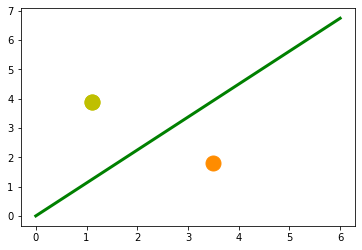

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(0, 7)
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or",
color="darkorange",
markersize=15)
ax.plot(1.1, 3.9, "oy",
markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()


on peut dire : Un point P(p1, p2) est 
• en dessous de la droite si m ⋅ p1− p2> 0
• sur la droite si m ⋅ p1− p2= 0
• au-dessus de la droite si m ⋅ p1− p2< 0

Nous pouvons maintenant le vérifier sur nos fruits. Le citron a les coordonnées (1.1, 3.9) et l'orange les coordonnées
3.5, 1.8. Le point sur la ligne, que nous avons utilisé pour définir notre ligne droite de séparation a les valeurs (4, 4,5). Alors
m est 4,5 divisé par 4

In [ ]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])
# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])


2.1375
-2.6624999999999996


nous n'avons pas calculé la ligne verte à l'aide de formules ou de méthodes mathématiques, mais nous l'avons déterminée arbitrairement en
jugement visuel. Nous aurions pu choisir d'autres lignes également.
Le programme Python suivant calcule et affiche un ensemble de lignes. Tous passant par l'origine, c'est-à-dire
point (0, 0). Les rouges sont totalement inutilisables dans le but de séparer les deux fruits, car dans
ces cas, le citron et l'orange sont du même côté de la ligne droite. Cependant, il est évident que
même les verts pourraient ne pas être trop utiles si nous avons plus que ces deux fruits. Certains citrons pourraient être
plus sucré et certaines oranges peuvent être assez acides.

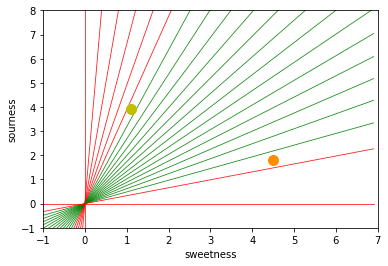

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def create_distance_function(a, b, c):
  """ 0 = ax + by + c """
  def distance(x, y):
    """returns tuple (d, pos). d is the distance. If pos == -1 point is below the line,
0 on the line and +1 if above the line"""
    nom = a * x + b * y + c
    if nom == 0:
      pos = 0
    elif (nom<0 and b<0) or (nom>0 and b>0):
      pos = -1
    else:
      pos = 1
    return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
  return distance
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)
step = 0.05
for x in np.arange(0, 1+step, step):
  slope = np.tan(np.arccos(x))
  dist4line1 = create_distance_function(slope, -1, 0)
  Y = slope * X
  results = []
  for point in fruits_coords:
    results.append(dist4line1(*point))
  if (results[0][1] != results[1][1]):
    ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
  else:
    ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
  if index== 0:
    ax.plot(x, y, "o",color="darkorange",markersize=size)

  else:
    ax.plot(x, y, "oy",markersize=size)
plt.show()

Fondamentalement, nous avons effectué une classification basée sur notre ligne de partage. Même si presque personne ne le ferait
décrire cela comme tel.
Il est facile d'imaginer que nous avons plus de citrons et d'oranges avec une acidité et une douceur légèrement différentes
valeurs. Cela signifie que nous avons une classe de citrons (class1) et une classe d'oranges class2. Ceci est représenté
dans le schéma suivant.

Nous allons "faire pousser" des oranges et des citrons avec un programme Python. Nous allons créer ces deux classes en
créant aléatoirement des points dans un cercle avec un point central et un rayon définis. Le code Python suivant
va créer les classes :

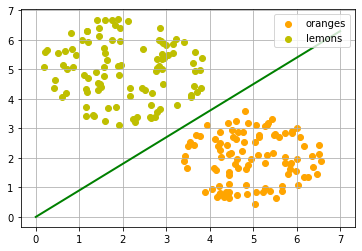

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def points_within_circle(radius,
  center=(0, 0),
  number_of_points=100):
  center_x, center_y = center
  r = radius * np.sqrt(np.random.random((number_of_points,)))
  theta = np.random.random((number_of_points,)) * 2 * np.pi
  x = center_x + r * np.cos(theta)
  y = center_y + r * np.sin(theta)
  return x, y
X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)
ax.scatter(oranges_x,
  oranges_y,
  c="orange",
  label="oranges")
ax.scatter(lemons_x,lemons_y,
  c="y",
  label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()


La ligne de démarcation a de nouveau été fixée arbitrairement à l'œil nu. La question se pose de savoir comment faire cela systématiquement ? Nous sommes
ne regardant toujours que les lignes droites passant par l'origine, qui sont uniquement définies par sa pente. la
le programme Python suivant calcule une ligne de démarcation en parcourant tous les fruits et ajuste dynamiquement
la pente de la ligne de partage que nous voulons calculer. Si un point est au-dessus de la ligne mais devrait être en dessous de la ligne, le
la pente sera incrémentée de la valeur de learning_rate . Si le point est en dessous de la ligne mais devrait être au-dessus
la ligne, la pente sera décrémentée de la valeur de learning_rate

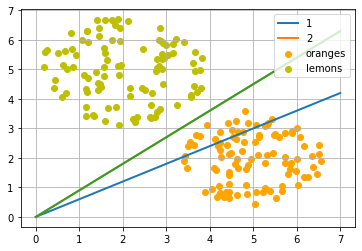

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
  oranges_y,
  c="orange",
  label="oranges")
ax.scatter(lemons_x,lemons_y,
  c="y",
  label="lemons")
fruits = list(zip(oranges_x,
  oranges_y,
  repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
  lemons_y,
  repeat(1, len(oranges_x))))
shuffle(fruits)
def adjust(learning_rate=0.3, slope=0.3):
  line = None
  counter = 0
  for x, y, label in fruits:
    res = slope * x - y
    #print(label, res)
    if label == 0 and res < 0:
      # point is above line but should be below
      # => increment slope
      slope += learning_rate
      counter += 1
      ax.plot(X, slope * X,
      linewidth=2, label=str(counter))
    elif label == 1 and res > 0:
      # point is below line but should be above
      # => decrement slope
      #print(res, label)
      slope -= learning_rate
      counter += 1
      ax.plot(X, slope * X,
      linewidth=2, label=str(counter))
  return slope
slope = adjust()
ax.plot(X,
slope * X,
linewidth=2)
ax.legend()
ax.grid()
plt.show()


une pente différente du "côté citron":

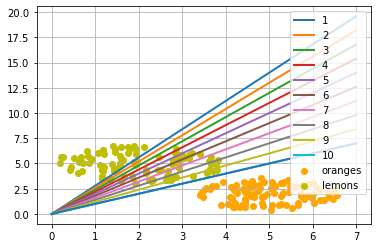

0.9999999999999996


In [ ]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
  oranges_y,
  c="orange",
  label="oranges")
ax.scatter(lemons_x,
  lemons_y,
  c="y",
  label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,
  slope * X,
  linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

# UN PERCEPTRON SIMPLE

Nous allons définir un réseau de neurones pour classer les ensembles de données précédents. Notre réseau de neurones ne fera que
se compose d'un neurone. Un neurone avec deux valeurs d'entrée, une pour "l'acidité" et une pour la "douceur".

Les deux valeurs d'entrée - appelées in_data dans notre programme Python ci-dessous - doivent être pondérées par leur poids
valeurs. Alors résolvons notre problème, nous définissons une classe Perceptron. Une instance de la classe est un Perceptron (ou
Neurone). Il peut être initialisé avec le input_length, c'est-à-dire le nombre de valeurs d'entrée, et les poids, qui peuvent
être donné sous la forme d'une liste, d'un tuple ou d'un tableau. S'il n'y a pas de valeurs pour les poids donnés ou si le paramètre est défini sur Aucun,
nous allons initialiser les poids à 1 / input_length.
Dans l'exemple suivant, choisissez -0,45 et 0,5 comme valeurs de pondération. Ce n'est pas la façon normale de faire
ce. Un réseau de neurones calcule automatiquement les poids pendant sa phase d'entraînement, comme nous l'apprendrons plus tard.

In [ ]:
import numpy as np
class Perceptron:
  def __init__(self, weights):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    return weighted_sum
p = Perceptron(weights=[-0.45, 0.5])
for point in zip(oranges_x[:10], oranges_y[:10]):
  res = p(point)
  print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
  res = p(point)
  print(res, end=", ")

-0.9411027559580665, -0.839458719496178, -1.1584496280562744, -0.5913966927255678, -1.6000939070847595, -1.007319322604896, -0.6915633433023207, -2.1673561569798077, -1.0783617759245694, -2.016463993263024, 2.1134769943430833, 2.7104991884566827, 2.2939098712989363, 0.45975819748985725, 2.558924509503168, 2.212512009173846, 1.2025044431559835, 1.7909242562502428, 1.5056701976401055, 2.7017989369766466, 

Nous pouvons voir que nous obtenons une valeur négative, si nous entrons une orange et une valeur posive, si nous entrons un citron. Avec
cette connaissance, nous pouvons calculer la précision de notre réseau de neurones sur cet ensemble de données :

In [ ]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
  res = p(point)
  if res < 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1
for point in zip(lemons_x, lemons_y):
  res = p(point)
  if res >= 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1
print(evaluation)


Counter({'corrects': 200})


Comment fonctionne le calcul ? Nous multiplions les valeurs d'entrée avec les poids et obtenons négatif et positif
valeurs. Examinons ce que nous obtenons, si le calcul aboutit à 0.Il s'agit d'une ligne droite séparant les oranges et les citrons, appelée limite de décision.
Nous visualisons cela avec le programme Python suivant :

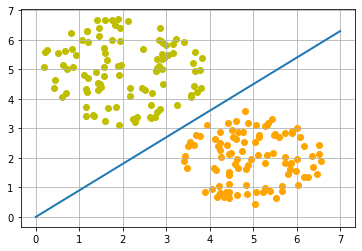

0.9


In [ ]:
import time
import matplotlib.pyplot as plt
slope = 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
  oranges_y,
  c="orange",
  label="oranges")
ax.scatter(lemons_x,
  lemons_y,
  c="y",
  label="lemons")
slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)
ax.grid()
plt.show()
print(slope)

# ENTRAINEMENT D'UN RESEAU DE NEURONE

Comme nous l'avons mentionné dans la section précédente : Nous n'avons pas entraîné notre réseau. Nous avons ajusté les poids aux valeurs
que nous savons formerait une ligne de démarcation. Nous voulons démontrer maintenant, ce qui est nécessaire pour entraîner nos simples
réseau neuronal.
Avant de commencer cette tâche, nous allons séparer nos données en données d'entraînement et de test dans le Python suivant
programme. En définissant random_state sur la valeur 42, nous aurons la même sortie pour chaque exécution, ce qui peut
être bénéfique à des fins de débogage.

In [ ]:
from sklearn.model_selection import train_test_split
import random
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
  [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)
data, labels = zip(*labelled_data)
res = train_test_split(data, labels,
  train_size=0.8,
  test_size=0.2,
  random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])


[(3.15579168580764, 5.873116402664985), (0.7207421385305457, 5.0198101094471905), (4.43589750379396, 0.645579794652162), (2.2297177804453443, 3.3283831104639585), (0.8418289479925436, 5.697047205144687), (1.5987515897341453, 6.684242025757359), (3.4052865392922413, 5.926883161108109), (1.1000147771405135, 4.828034031185053), (6.017291086342685, 3.0271739322547444), (1.3828077821864386, 4.917396534945363)] [1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


Comme nous commençons avec deux poids arbitraires, nous ne pouvons pas nous attendre à ce que le résultat soit correct. Pour certains points (fruits) il
peut retourner la bonne valeur, c'est-à-dire 1 pour un citron et 0 pour une orange. Dans le cas où nous obtenons le mauvais résultat, nous devons
corriger nos valeurs de poids. Il faut d'abord calculer l'erreur. L'erreur est la différence entre la cible ou
valeur attendue ( résultat_cible ) et la valeur calculée ( résultat_calculé ). Avec cette erreur
nous devons ajuster les valeurs de poids avec une valeur incrémentielle, c'est-à-dire w1= w1+ Δw1et w2= w2+ Δw2

Si l'erreur e est 0, c'est-à-dire que le résultat cible est égal au résultat calculé, nous n'avons rien à faire. Le
réseau est parfait pour ces valeurs d'entrée. Si l'erreur n'est pas égale, nous devons changer les poids. Nous devons
modifier les poids en leur ajoutant de petites valeurs. Ces valeurs peuvent être positives ou négatives. Le montant que nous
avoir un changement une valeur de poids dépend de l'erreur et de la valeur d'entrée. Supposons, x1
= 0 et x2> 0.
Dans ce cas le résultat dans ce cas uniquement résulte sur l'entrée x2
. Cela signifie d'autre part que nous pouvons
minimiser l'erreur en changeant uniquement w2
. Si l'erreur est négative, nous devrons lui ajouter une valeur négative,
et si l'erreur est positive, nous devrons lui ajouter une valeur positive. De cela, nous pouvons comprendre que
quelles que soient les valeurs d'entrée, nous pouvons les multiplier par l'erreur et nous obtenons des valeurs, nous pouvons ajouter à la
poids. Une chose manque encore : en faisant cela, nous apprendrions à jeûner. Nous avons de nombreux échantillons et chaque échantillon
devrait seulement changer un peu les poids. Il faut donc multiplier ce résultat par un taux d'apprentissage
( self.learning_rate ). Le taux d'apprentissage est utilisé pour contrôler la vitesse à laquelle les poids sont mis à jour. Petit
les valeurs du taux d'apprentissage entraînent un long processus d'entraînement, des valeurs plus élevées risquent de se retrouver dans des valeurs de poids sous-optimales. Nous verrons cela de plus près dans notre chapitre sur la rétropropagation.
Nous sommes maintenant prêts à écrire le code pour adapter les poids, ce qui signifie entraîner le réseau. Pour ça
Dans ce but, nous ajoutons une méthode 'adjust' à notre classe Perceptron. La tâche de cette méthode est de corriger l'erreur.

In [ ]:
import numpy as np
from collections import Counter
class Perceptron:
  def __init__(self,weights,learning_rate=0.1):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
    self.learning_rate = learning_rate
  @staticmethod
  def unit_step_function(x):
    if x < 0:
      return 0
    else:
      return 1
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    #print(in_data, weighted_input, weighted_sum)
    return Perceptron.unit_step_function(weighted_sum)
  def adjust(self,
    target_result,
    calculated_result,
    in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) #
      error = target_result - calculated_result
    if error != 0:
      correction = error * in_data * self.learning_rate
      self.weights += correction
      #print(target_result, calculated_result, error, in_data, correction, self.weights)
  def evaluate(self, data, labels):
    evaluation = Counter()
    for index in range(len(data)):
      label = int(round(p(data[index]),0))
      if label == labels[index]:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation
p = Perceptron(weights=[0.1, 0.1],
  learning_rate=0.3)
for index in range(len(train_data)):
  p.adjust(train_labels[index],
  p(train_data[index]),
  train_data[index])
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)


[('correct', 160)]
[('correct', 40)]
[-2.41228209  2.46938089]


Tant sur l'apprentissage que sur les données de test, nous n'avons que des valeurs correctes, c'est-à-dire que notre réseau était capable d'apprendre
automatiquement et avec succès !
Nous visualisons la frontière de décision avec le programme suivant :

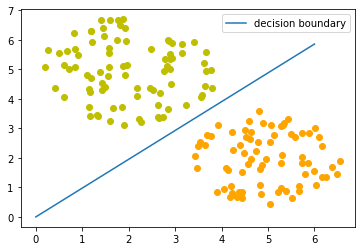

[-2.41228209  2.46938089]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

Intéressons-nous à l'algorithme

0 -1.0 [0.1 0.1] (3.15579168580764, 5.873116402664985)
1 -1.0 [0.1 0.1] (0.7207421385305457, 5.0198101094471905)
2 -13.138865219265304 [-1.23076925 -0.09367394] (4.43589750379396, 0.645579794652162)
3 0.6209421547747536 [-0.56185392  0.90484099] (2.2297177804453443, 3.3283831104639585)
4 0.6209421547747536 [-0.56185392  0.90484099] (0.8418289479925436, 5.697047205144687)
5 0.6209421547747536 [-0.56185392  0.90484099] (1.5987515897341453, 6.684242025757359)
6 0.6209421547747536 [-0.56185392  0.90484099] (3.4052865392922413, 5.926883161108109)
7 0.6209421547747536 [-0.56185392  0.90484099] (1.1000147771405135, 4.828034031185053)
8 0.6209421547747536 [-0.56185392  0.90484099] (6.017291086342685, 3.0271739322547444)
9 0.6209421547747536 [-0.56185392  0.90484099] (1.3828077821864386, 4.917396534945363)
10 42.89724786552095 [-1.82962008  0.04265122] (4.225887214978333, 2.873965906068264)
11 42.89724786552095 [-1.82962008  0.04265122] (4.090024646716532, 1.6663835368350872)
12 0.7603427398785

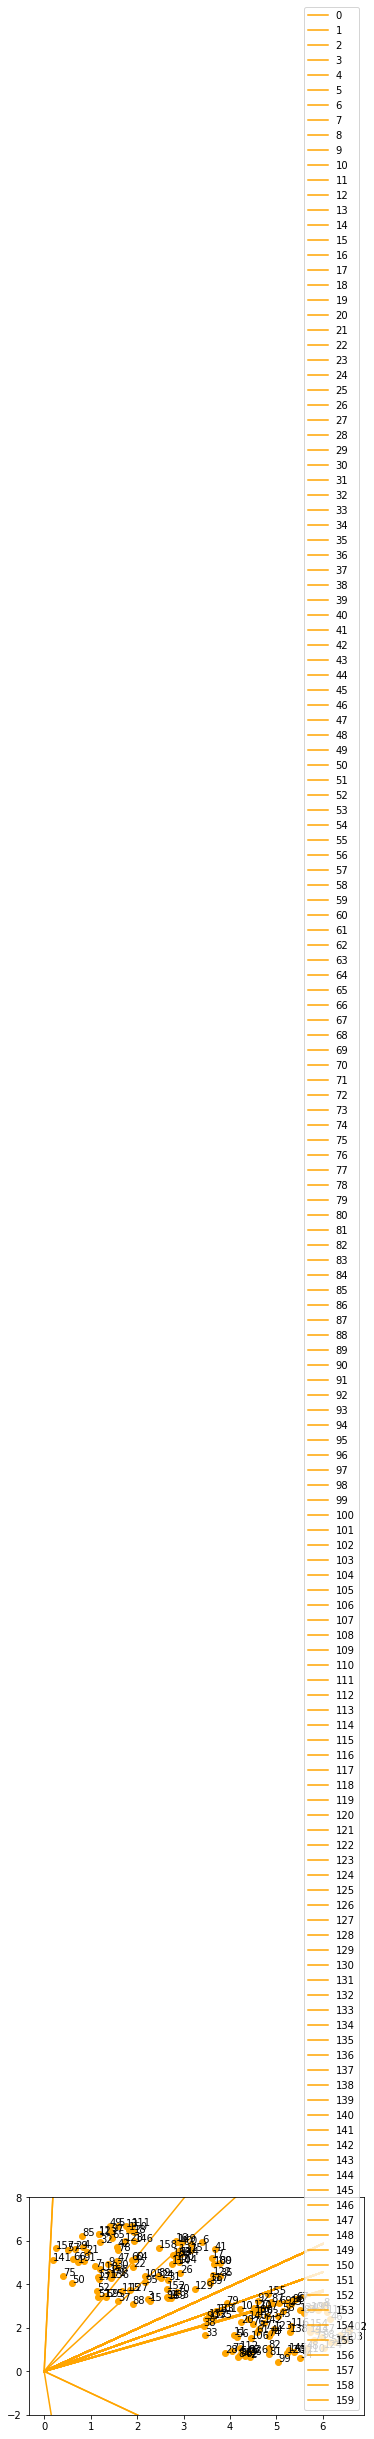

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
p = Perceptron(weights=[0.1, 0.1],learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0
for index in range(len(train_data)):
  old_weights = p.weights.copy()
  p.adjust(train_labels[index],
    p(train_data[index]),
    train_data[index])
  if not np.array_equal(old_weights, p.weights):
    if train_labels[index] == 0:
      color = "orange"  
  ax.scatter(train_data[index][0],train_data[index][1],color="orange")
  ax.annotate(str(counter),(train_data[index][0], train_data[index][1]))
  m = -p.weights[0] / p.weights[1]
  print(index, m, p.weights, train_data[index])
  ax.plot(X, m * X, label=str(counter), color="orange")
  counter += 1
ax.legend()
plt.show()

#RÉSEAUX DE NEURONES SIMPLES

un réseau de neurones constitué d'un seul perceptron suffisait à
séparer nos classes d'exemple. Bien sûr, nous avons soigneusement conçu ces
des cours pour que ça marche. Il existe de nombreux groupes de classes, pour lesquels il sera
ne fonctionne pas. Nous allons examiner d'autres exemples et allons
discuter des cas où il ne sera pas possible de séparer les classes.
Nos classes ont été linéairement séparables. La séparabilité linéaire a du sens
en géométrie euclidienne. Deux ensembles de points (ou classes) sont appelés linéairement
séparable, s'il existe au moins une droite dans le plan telle que toutes les
les points d'une classe sont d'un côté de la ligne et tous les points de l'autre
classe sont de l'autre côté.

Nous avons appris dans le chapitre précédent qu'un réseau de neurones avec un perceptron et deux valeurs d'entrée peut être
interprété comme une frontière de décision, c'est-à-dire une ligne droite divisant deux classes. Les deux classes que nous voulons classer
dans notre exemple ressemble à ceci

[]

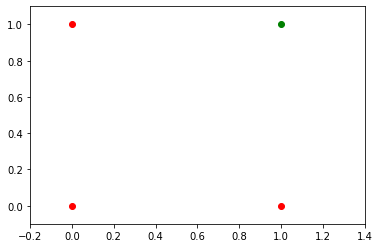

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

Nous avons également découvert qu'un tel réseau neuronal primitif n'est capable de créer que des lignes droites passant par
l'origine. Donc, des lignes de séparation comme celle-ci :

[]

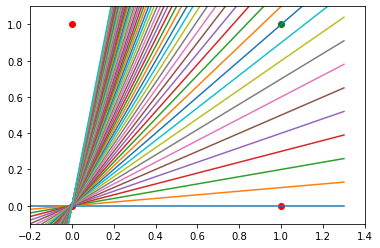

In [ ]:
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
  ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()


Nous pouvons voir qu'aucune de ces lignes droites ne peut être utilisée comme frontière de décision ni aucune autre ligne allant
par l'origine.
Nous avons besoin d'une ligne
y = m ⋅ x + c
où l'ordonnée à l'origine c n'est pas égale à 0.
Par exemple la ligne
y = − x + 1,2

[]

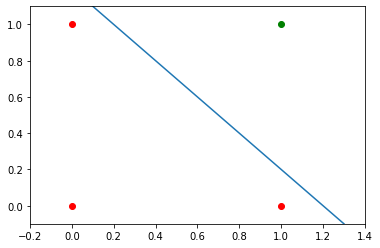

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

Un perceptron avec deux valeurs d'entrée et un biais correspond à une droite générale. A l'aide du biais
valeur b nous pouvons entraîner le perceptron pour déterminer une frontière de décision avec une interception non nulle c .
Production: []
RÉSEAUX DE NEURONES SIMPLES 118
Bien que les valeurs d'entrée puissent changer, une valeur de biais reste toujours constante. Seul le poids du nœud de biais peut
être adapté

In [ ]:
import numpy as np
from collections import Counter
class Perceptron:
  def __init__(self,weights,bias=1,learning_rate=0.3):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
    self.bias = bias
    self.learning_rate = learning_rate
  @staticmethod
  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1
  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)
  def adjust(self,target_result,in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) #
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weights += correction
  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      result = self(sample) # predict
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation




Nous supposons que le code Python ci-dessus avec la classe Perceptron est stocké dans votre répertoire de travail actuel
sous le nom 'perceptrons.py'

In [ ]:
import numpy as np
from perceptrons import Perceptron
def labelled_samples(n):
  for _ in range(n):
    s = np.random.randint(0, 2, (2,))
    yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.2)
for in_data, label in labelled_samples(30):
  p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


ModuleNotFoundError: ignored

le module perceptron n'arrive pas a etre installé

-1.0 1.023670033665644


[]

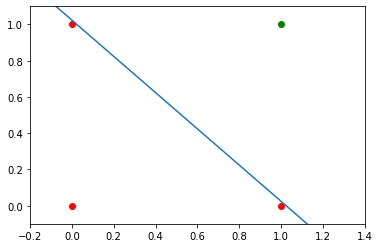

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[1] / p.weights[1]
c = -p.weights[1] / p.weights[0]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

Nous allons créer un autre exemple avec des ensembles de données linéairement séparables, qui nécessitent un nœud de biais pour être séparables. Nous
utilisera la fonction make_blobs de sklearn.datasets 

In [ ]:
from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,centers=([2.5, 3], [6.7, 7.9]),random_state=0)


Visualisons les données précédemment créées :

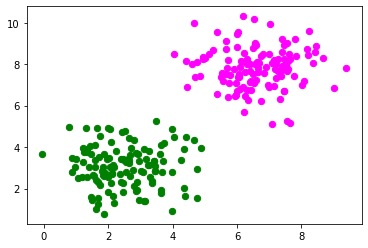

In [ ]:
import matplotlib.pyplot as plt
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()
for n_class in range(2):
  ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
  c=colours[n_class], s=40, label=str(n_class))

In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]
from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
  p.adjust(label,sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)



Visualisons la frontière de décision :

1.023670033665644 -1.0


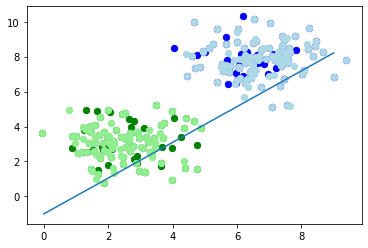

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
  ax.scatter(learn_data[learn_labels==n_class][:, 0],
    learn_data[learn_labels==n_class][:, 1],
    c=colours[n_class], s=40, label=str(n_class))
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
  ax.scatter(test_data[test_labels==n_class][:, 0],
    test_data[test_labels==n_class][:, 1],
    c=colours[n_class], s=40, label=str(n_class))
X = np.arange(np.max(samples[:,0]))
m = -p.weights[1] / p.weights[0]
c = -p.weights[0] / p.weights[0]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


on obtient un message d'erreur quand on met l'indice 2

#le probleme du XOR pour les réseaux de neurones

Quelle que soit la ligne droite choisie, vous ne réussirez jamais à avoir les points bleus d'un côté et les
points orange de l'autre côté. Ceci est illustré dans la figure suivante. Les points oranges sont sur l'orange
doubler. Cela signifie qu'il ne peut pas s'agir d'une ligne de démarcation. Si nous déplaçons cette ligne parallèlement - quelle que soit la direction,
il y aura toujours deux points orange et un point bleu d'un côté et un seul point bleu de l'autre côté. Si nous
déplacer l'orPour résoudre ce problème, nous devons introduire un nouveau type de réseaux de neurones, un réseau avec ce qu'on appelle caché
couches. Une couche cachée permet au réseau de réorganiser ou de réorganiser les données d'entrée.
ange de manière non parallèle, il y aura un point bleu et un point orange de chaque côté, sauf
si la ligne passe par un point orange. Il n'y a donc aucun moyen pour une seule ligne droite séparant ces points

Pour résoudre ce problème, nous devons introduire un nouveau type de réseaux de neurones, un réseau avec des réseaux dits cachés.
couches. Une couche cachée permet au réseau de réorganiser ou de réorganiser les données d'entrée

EXERCISE 1 : Nous pourrions étendre le ET logique pour faire flotter des valeurs entre 0 et 1 .Essayez de former un réseau de neurones avec un seul perceptron. Pourquoi ça ne marche pas ?

solution

In [ ]:
from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],
bias=1,
learning_rate=0.2)
def labelled_samples(n):
for _ in range(n):
s = np.random.random((2,))
yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
for in_data, label in labelled_samples(30):
p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)



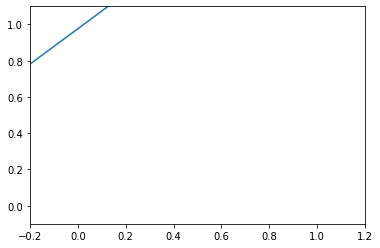

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[0] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
from perceptrons import Perceptron
import numpy as np
from collections import Counter
def labelled_samples(n):
  for _ in range(n):
    s = np.random.random((2,))
    yield (s, 0) if s[0] < 0.5 else (s, 1)
p = Perceptron(weights=[0.3, 0.3, 0.3],
  learning_rate=0.4)
for in_data, label in labelled_samples(300):
  p.adjust(label,
  in_data)
test_data, test_labels = list(zip(*labelled_samples(500)))
print(p.weights)
p.evaluate(test_data, test_labels)

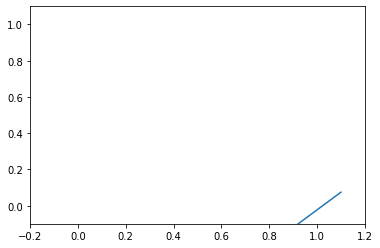

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[1] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

#RÉSEAUX DE NEURONES, STRUCTURE,POIDS ET MATRICES

pn introduit l'idée de réseaux de neurones dans le chapitre précédent de
notre tutoriel d'apprentissage automatique.
Nous avons souligné la similitude
entre les neurones et les réseaux de neurones dans
la biologie. Nous avons également introduit de très petites
réseaux de neurones artificiels et introduit
frontières de décision et le XOR
problème.
Dans les exemples simples que nous avons introduits
loin, nous avons vu que les poids sont les
éléments essentiels d'un réseau de neurones. Avant que
nous commençons à écrire un réseau de neurones avec plusieurs couches, nous devons regarder de plus près les poids.
Nous devons voir comment initialiser les poids et comment multiplier efficacement les poids avec les valeurs d'entrée.

La couche d'entrée est différente des autres couches. Les nœuds de la couche d'entrée sont passifs. Cela signifie que le
les neurones d'entrée ne modifient pas les données, c'est-à-dire qu'aucun poids n'est utilisé dans ce cas. Ils reçoivent une seule valeur
et dupliquer cette valeur à leurs nombreuses sorties

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)


[ 2  4 11]


Dans l'algorithme, que nous écrirons plus tard, nous devrons le transposer dans un vecteur colonne, c'est-à-dire un tableau à deux dimensions avec une seule colonne :

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


Il existe différentes façons d'initialiser les matrices de poids de manière aléatoire. Le premier que nous allons introduire est l'unité
fonction de numpy.random. Il crée des échantillons qui sont uniformément répartis sur l'intervalle semi-ouvert
[faible, élevé), ce qui signifie que le bas est inclus et que le haut est exclu. Chaque valeur dans l'intervalle donné est
également susceptibles d'être attirés par 'uniforme'

In [ ]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))


True


L'histogramme des échantillons, créé avec la fonction uniforme dans notre exemple précédent, ressemble à ceci :

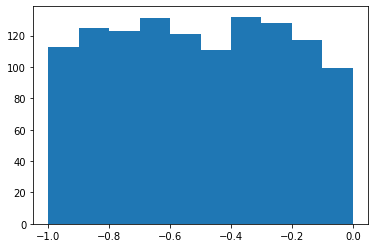

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

La prochaine fonction que nous examinerons est 'binomial' de numpy.binomial :
binôme(n, p, taille=Aucun)
Il tire des échantillons d'une distribution binomiale avec specLa prochaine fonction que nous examinerons est 'binomial' de numpy.binomial :
binôme(n, p, taille=Aucun)
Il tire des échantillons d'une distribution binomiale avec des paramètres spécifiés, n essais et une probabilité p de
succès où n est un entier >= 0 et p est un flottant dans l'intervalle [0,1]. ( n peut être entré sous forme de nombre flottant, mais
il est tronqué à un entier utilisé)
paramètres spécifiés, n essais et probabilité p de
succès où n est un entier >= 0 et p est un flottant dans l'intervalle [0,1]. ( n peut être entré sous forme de nombre flottant, mais
il est tronqué à un entier utilisé)

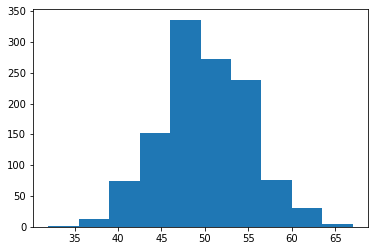

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

Nous aimons créer des nombres aléatoires avec une distribution normale, mais les nombres doivent être bornés. Ce n'est pas
le cas avec np.random.normal(), car il n'offre aucun paramètre lié.
Nous pouvons utiliser truncnorm de scipy.stats à cette fin.
La forme standard de cette distribution est une normale standard tronquée à l'intervalle [a, b] — notez que a et b
sont définis sur le domaine de la normale standard. Pour convertir des valeurs de clip pour une moyenne et une norme spécifiques
écart, utilisez :a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

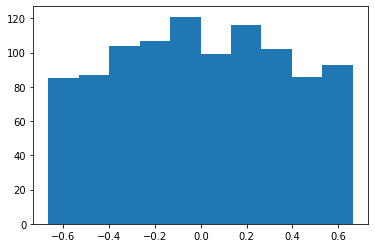

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()


La fonction 'truncnorm' est difficile à utiliser. Pour vous faciliter la vie, nous définissons une fonction truncated_normal
dans ce qui suit pour faciliter cette tâche :

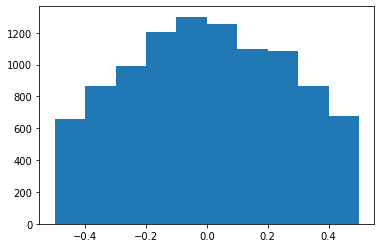

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()


Autres exemples :

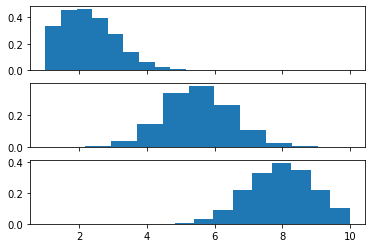

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

Nous pouvons donc créer notre matrice "wih" avec :

In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.42789305,  0.47764481,  0.3104567 ],
       [ 0.47701592, -0.26821606, -0.44689435],
       [ 0.45271676,  0.03102661,  0.34516458],
       [ 0.2333154 ,  0.51621017, -0.14610877]])

De même, nous pouvons maintenant définir la matrice de poids "who"

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.2132232 ,  0.42611912,  0.09149295,  0.26654017],
       [-0.39224429,  0.27832593,  0.46460332, -0.36092859]])

#EXPLOITER UN RÉSEAU DE NEURONES AVEC PYTHON

UNE CLASSE DE RÉSEAU DE NEURONES

Les méthodes les plus essentielles dont notre classe a besoin sont :
• __init__ pour initialiser une classe, c'est-à-dire que nous allons définir
le nombre de neurones pour chaque couche et
initialiser les matrices de poids.
• run : Une méthode qui est appliquée à un échantillon,
que nous voulons classer. Il applique ceci
échantillon au réseau de neurones. On pourrait dire, nous
'exécuter' le réseau pour 'prédire' le résultat. Cette
la méthode est dans d'autres implémentations souvent connues
comme prédire.
• train : cette méthode obtient un échantillon et la valeur cible correspondante en entrée. Avec ça
entrée, il peut ajuster les valeurs de poids si nécessaire. Cela signifie que le réseau apprend à partir d'une entrée.
Vu du point de vue de l'utilisateur, nous « entraînons » le réseau. Dans sklearn par exemple, cette méthode
est appelé en forme

Le code Python suivant contient une implémentation d'une classe de réseau neuronal appliquant les connaissances que nous
développé dans le chapitre précédent :


In [ ]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
    (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,
    no_of_in_nodes,
    no_of_out_nodes,
    no_of_hidden_nodes,
    learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
  def train(self):
    pass
  def run(self):
    pass

Nous ne pouvons pas faire grand-chose avec ce code, mais nous pouvons au moins l'initialiser. On peut aussi regarder le poids
matrices :

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,no_of_out_nodes = 2,no_of_hidden_nodes = 4,learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.37951601 -0.27892196 -0.4161936 ]
 [ 0.45281282  0.31857387 -0.33252441]
 [-0.15710183 -0.37847344 -0.27272072]
 [-0.40785598  0.24662838  0.0283991 ]]
[[-0.27817161  0.10665339 -0.25206357 -0.37004079]
 [-0.49436092  0.42279369 -0.11627914  0.45646928]]


FONCTIONS D'ACTIVATION, SIGMOÏDE ET RELU

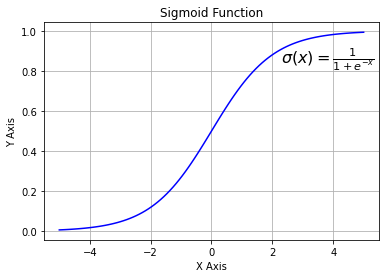

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()


In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))


0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


La fonction logistique est souvent utilisée dans les réseaux de neurones pour introduire de la non-linéarité dans le modèle et pour cartographier
signaux dans une plage spécifiée, c'est-à-dire 0 et 1. Il est également très apprécié car la dérivée - nécessaire dans
rétropropagation - est simple.

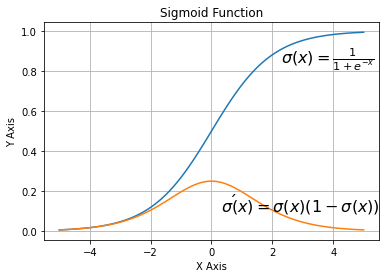

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()


Nous pouvons également définir notre propre fonction sigmoïde avec le décorateur vectorize de numpy :

In [ ]:
@np.vectorize
def sigmoid(x):
  return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

Une autre fonction d'activation facile à utiliser est la fonction ReLU. ReLU signifie unité linéaire rectifiée. C'est aussi
connue sous le nom de fonction de rampe. Il est défini comme la partie positive de son argument, c'est-à-dire y = max (0, x). C'est
"actuellement, la fonction d'activation la plus réussie et la plus largement utilisée est l'Unité Linéaire Rectifiée (ReLU)"1
La fonction ReLu est plus efficace en termes de calcul que les fonctions de type sigmoïde, car Relu signifie uniquement
choisir le maximum entre 0 et l'argument x . Alors que les sigmoïdes doivent effectuer des opérations coûteuses
opérations exponentielles.

In [ ]:
# alternative activation function
def ReLU(x):
  return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
  if x <= 0:
    return 0
  else:
    return 1

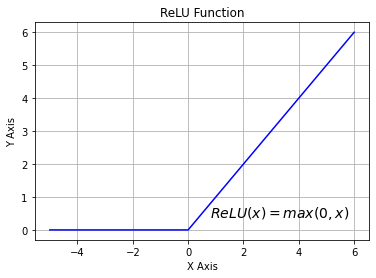

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()


AJOUTER UNE MÉTHODE D'EXÉCUTION

lasse. Nous allons utiliser scipy.special comme fonction d'activation et le renommer en
fonction_activation :

In [ ]:
from scipy.special import expit as activation_function

Tout ce que nous avons à faire dans la méthode run consiste en ce qui suit.
1. Multiplication matricielle du vecteur d'entrée et de la matrice weights_in_hidden.
2. Application de la fonction d'activation au résultat de l'étape 1
3. Multiplication matricielle du vecteur résultat de l'étape 2 et de la matrice weights_in_hidden.
4. Pour obtenir le résultat final : Appliquer la fonction d'activation au résultat de 3

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,
    no_of_in_nodes,
    no_of_out_nodes,
    no_of_hidden_nodes,
    learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    """ A method to initialize the weight matrices of the neur
    al network"""
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
      self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
      self.no_of_hidden_nodes))
  def train(self, input_vector, target_vector):
    pass
  def run(self, input_vector):
    """
    running the network with an input vector 'input_vector'.
    'input_vector' can be tuple, list or ndarray
    """
    # turning the input vector into a column vector
    input_vector = np.array(input_vector, ndmin=2).T
    input_hidden = activation_function(self.weights_in_hidden@ input_vector)
    output_vector = activation_function(self.weights_hidden_out @ input_hidden)
    return output_vector



Nous pouvons instancier une instance de cette classe, qui sera un réseau de neurones. Dans l'exemple suivant nous
créer un réseau avec deux nœuds d'entrée, quatre nœuds cachés et deux nœuds de sortie.

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=2,no_of_hidden_nodes=4,learning_rate=0.6)

Nous pouvons appliquer la méthode run à tous les tableaux avec une forme de (2,), ainsi qu'aux listes et tuples avec deux chiffres
éléments. Le résultat de l'appel est défini par les valeurs aléatoires des poids :

In [ ]:
simple_network.run([(3, 4)])


array([[0.46869542],
       [0.49704517]])

#RETROPROPAGATION DANS LES RESEAUX DE NEURONES

La rétropropagation est nécessaire pour calculer le gradient,
dont nous avons besoin pour adapter les poids des matrices de poids. Le poids du neurone (nœuds) de notre réseau
sont ajustés en calculant le gradient de la fonction de perte. A cet effet une optimisation de descente de gradient
algorithme est utilisé. On parle aussi de rétro-propagation des erreurs.
Très souvent, les gens sont effrayés par les mathématiques utilisées. Nous essayons de l'expliquer en termes simples.
Expliquer la descente de gradient commence dans de nombreux articles ou tutoriels avec des montagnes. Imaginez que vous êtes mis sur un
montagne, pas nécessairement le sommet, par un hélicoptère la nuit ou dans un épais brouillard. Imaginons encore que cela
la montagne est sur une île et vous voulez atteindre le niveau de la mer. Tu dois descendre, mais tu ne vois presque rien,
peut-être quelques mètres. Votre tâche est de trouver votre chemin, mais vous ne pouvez pas voir le chemin. Vous pouvez utiliser le
méthode de descente de gradient. Cela signifie que vous examinez la pente à votre position actuelle. Tu
procédera dans la direction avec la descente la plus raide. Vous ne faites que quelques pas, puis vous vous arrêtez à nouveau pour
réorientez-vous. Cela signifie que vous appliquez à nouveau la procédure décrite précédemment, c'est-à-dire que vous
à la recherche de la descente la plus raide.